# Cargo librerías



In [ ]:
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos

from sklearn.decomposition import PCA #Componentes principales
from sklearn.preprocessing import StandardScaler #Escalado de datos

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #discriminante lineal
# también se puede usar el cuadrático
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# métricas para evaluar la clasificación predicha
from sklearn.metrics import accuracy_score, recall_score, precision_score
# otras métricas se pueden ver acá: https://scikit-learn.org/stable/modules/model_evaluation.html#

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (8,8)

# Datos y exploración

In [ ]:
#https://www.kaggle.com/ronitf/heart-disease-uci
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )
nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']

# Hay veces conviene así, si los datos tiene faltantes
# https://www.kaggle.com/adityakadiwal/water-potability
# datos = np.genfromtxt('./water_potability.csv',delimiter=',', skip_header=1)#, usecols = (1,2,3,4) )
#elimina todas las filas con "nan"
# datos = datos[~np.isnan(datos).any(axis=1)]


# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
# print(X.shape)
# print(X[0:5,:])

# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = datos[:,-1]
# print(y.shape)
# print(y[0:5])


# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X) #calcula promedio y desvío
X = scaler.transform(X) #estandariza con promedio y desvío antes calculado

# Clasificador Análisis Discriminante Lineal



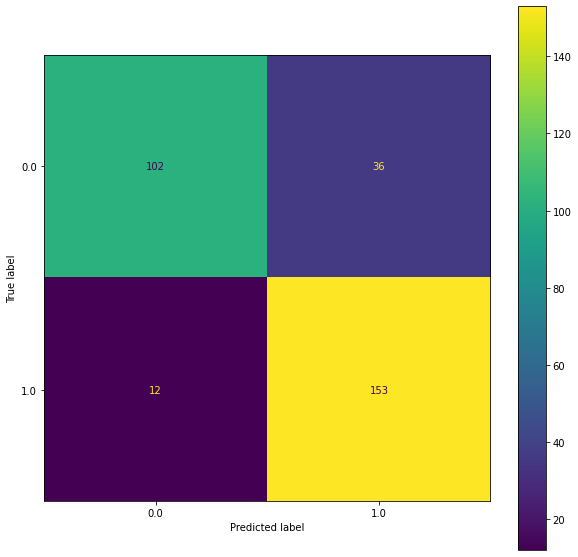

In [ ]:
lda = LinearDiscriminantAnalysis() #instancio la clase
modelo_lda = lda.fit(X, y) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred = modelo_lda.predict(X) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta

# Es una mala idea predecir con los mismos datos de entrenamiento: recordar que el objetivo es
# predecir la clasif. de datos NUEVOS no utilizados para entrenar el modelo.
# Por ahora lo dejamos así, pero pueden investigar si quieren y pueden.

# matriz de confusión
conf = confusion_matrix(y,y_pred)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=lda.classes_)
disp.plot(values_format='d') 

# Clasificación por punto de corte arbitrario

[[0.172 0.828]
 [0.181 0.819]
 [0.002 0.998]
 [0.096 0.904]
 [0.103 0.897]
 [0.295 0.705]
 [0.013 0.987]
 [0.131 0.869]
 [0.12  0.88 ]
 [0.073 0.927]]


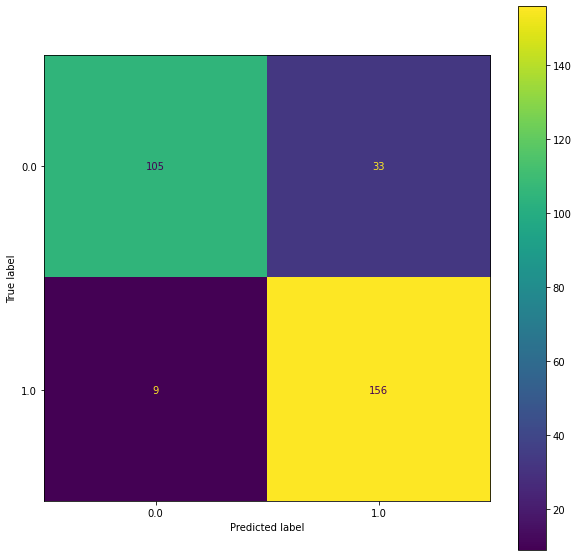

In [ ]:
probas = lda.predict_proba(X) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
with np.printoptions(precision=3, suppress=True):
    print(probas[0:10])

# por ejemplo, por defecto asumo que SÍ tiene riesgo cardíco (y=1)
y_pred_custom = np.ones(y.shape)

#y si la probabilidad de y=0 es mayor a 0.8, lo clasifico como sin riesgo (y=0)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.8):
        y_pred_custom[i]=0.
# lo anterior se puede hacer más copado con listas por comprensión
# https://realpython.com/list-comprehension-python/
# https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion10/listas_comprension.html


conf_custom = confusion_matrix(y,y_pred_custom)

disp_custom = ConfusionMatrixDisplay(confusion_matrix=conf_custom, display_labels=lda.classes_)
disp_custom.plot(values_format='d') 

# Visualizar resultados por Componentes principales

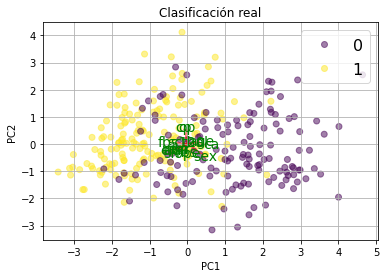

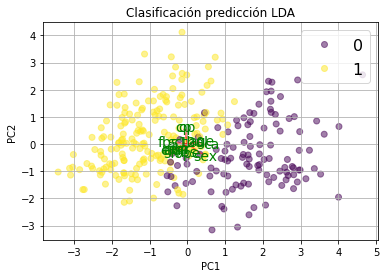

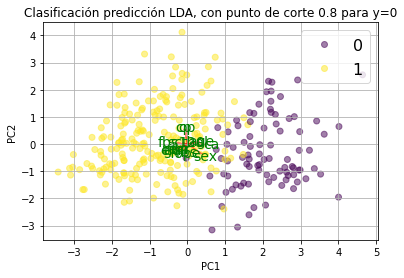

In [ ]:
pca = PCA()
pca.fit(X)
x_new = pca.transform(X)


def myplot(score,coeff,clases,labels=None):
    plt.figure()
    
    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2, c=clases, alpha=0.5)#, cmap=colours)
    
    # print(scatter.legend_elements())
    # muestra etiquetas de las clases de la clasificación
    plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales para cada clasificación

#clasificación real
myplot(x_new[:,0:2], pca.components_, y, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación real")
plt.grid()
plt.show()

#clasificación LDA
myplot(x_new[:,0:2], pca.components_, y_pred, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción LDA")
plt.grid()
plt.show()

#clasif. LDA con punto de corte 0.8 para y=0
myplot(x_new[:,0:2], pca.components_, y_pred_custom, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción LDA, con punto de corte 0.8 para y=0")
plt.grid()
plt.show()


# Matriz de confusión:

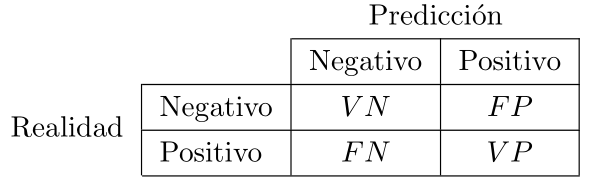

- VP = verdadero positivo
- VN = verdadero negativo
- FP = falso positivo
- FN = falso negativo

# Métricas para evaluar la clasificación:

### Accuracy
$$\text{Accuracy = }\frac{VP+VN}{Total} = \frac{VP+VN}{VP+VN+FP+FN}$$

### Recall
$$\text{Recall = }\frac{VP}{VP+FN}$$

### Precision
$$\text{Precision = }\frac{VP}{VP+FP}$$

In [ ]:
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)

print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

#Compararlas contra Bayes ingenuo, ¿hay diferencias?, ¿por qué?

Accuracy:  0.84
Recall:  0.93
Precision:  0.81
